In [1]:
import sys
print (sys.version)

sys.path.append('../scripts')
#sys.path.append('/home/bxie/PycharmProjects/opioid/Contact_frequency/GPCR_PDBs/scripts')

from run import *
from _heatmap import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 10}
matplotlib.rc('font', **font)
convert_index = False

import timeit
np.set_printoptions(threshold=np.inf)

%load_ext autoreload
%autoreload 2

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


In [2]:
##### See "In [11]", Combine two trajectories information
##### PROBLEM is in the format mismatch between ylabels and union_ylables
##### ylabels and xlabels: format %3d
##### union_labels: format free

#### line 90 in wrap_toolkit.py (adding %3d) fix this problem in expanded_function
#### now check the output, the problem is fixed for this function!!

#### Now, error in reordered function


####### UPDATE Dec 7, 2020 ########
####### functions in wrap_toolkit.py are used for traj_freq calculations not just for combining the trajs 
####### Therefore, fixing the format in wrap_toolkit.py will cause issues for other functions

######## Changed the format in vmd_contact.py
######## e.g. function contact_freq_vmd, lines 162, 164, 166 (%3d --> %d)
######## Then, adding key = lambda x: (len (x), x) to the sorted part line 181 (I did it only for Galpha residues)
######## But we need to fix it everywhere
######## Run *.ipynb for two trajs and all calculations are fine!!!

In [3]:
pwd

'/home/leila/repositories/pia-x/coupler/union_traj_freq_example'

### Analyze the 1st traj

In [4]:
matrix, xlabels, ylabels, x_axis_label, y_axis_label = master('traj_frequency', 'mdmb', 'mdmb_parameters.ini',convert_index)

#print(matrix)
print(xlabels)
print('')
print(ylabels)

print(len(xlabels))
print(len(ylabels))

  0%|          | 0/290 [00:00<?, ?it/s]

mdmb_parameters.ini
['mdmb']
It will search all possible residues and may take a while.


 16%|█▌        | 45/290 [01:12<06:31,  1.60s/it]

keep record:r_id 149 and l_id 24
rec_residue CYS and lig_residue ARG



 16%|█▌        | 47/290 [01:15<06:27,  1.59s/it]

keep record:r_id 150 and l_id 350
rec_residue ARG and lig_residue ASP



 17%|█▋        | 49/290 [01:18<06:25,  1.60s/it]

keep record:r_id 152 and l_id 350
rec_residue SER and lig_residue ASP

keep record:r_id 152 and l_id 351
rec_residue SER and lig_residue CYS

keep record:r_id 152 and l_id 352
rec_residue SER and lig_residue GLY



 17%|█▋        | 50/290 [01:20<06:23,  1.60s/it]

keep record:r_id 153 and l_id 349
rec_residue TYR and lig_residue LYS

keep record:r_id 153 and l_id 350
rec_residue TYR and lig_residue ASP

keep record:r_id 153 and l_id 352
rec_residue TYR and lig_residue GLY



 38%|███▊      | 110/290 [02:56<04:47,  1.60s/it]

keep record:r_id 213 and l_id 351
rec_residue ASH and lig_residue CYS



 38%|███▊      | 111/290 [02:58<04:46,  1.60s/it]

keep record:r_id 214 and l_id 347
rec_residue ARG and lig_residue ASN

keep record:r_id 214 and l_id 348
rec_residue ARG and lig_residue LEU

keep record:r_id 214 and l_id 350
rec_residue ARG and lig_residue ASP

keep record:r_id 214 and l_id 351
rec_residue ARG and lig_residue CYS

keep record:r_id 214 and l_id 352
rec_residue ARG and lig_residue GLY

keep record:r_id 214 and l_id 353
rec_residue ARG and lig_residue LEU



 39%|███▉      | 114/290 [03:03<04:41,  1.60s/it]

keep record:r_id 217 and l_id 344
rec_residue SER and lig_residue ILE

keep record:r_id 217 and l_id 347
rec_residue SER and lig_residue ASN

keep record:r_id 217 and l_id 348
rec_residue SER and lig_residue LEU

keep record:r_id 217 and l_id 351
rec_residue SER and lig_residue CYS



 40%|███▉      | 115/290 [03:04<04:39,  1.60s/it]

keep record:r_id 218 and l_id 344
rec_residue ILE and lig_residue ILE

keep record:r_id 218 and l_id 347
rec_residue ILE and lig_residue ASN

keep record:r_id 218 and l_id 348
rec_residue ILE and lig_residue LEU



 40%|████      | 116/290 [03:06<04:37,  1.60s/it]

keep record:r_id 220 and l_id 193
rec_residue ARG and lig_residue ASP



 40%|████      | 117/290 [03:07<04:36,  1.60s/it]

keep record:r_id 220 and l_id 347
rec_residue ARG and lig_residue ASN



 41%|████      | 118/290 [03:09<04:34,  1.60s/it]

keep record:r_id 221 and l_id 340
rec_residue PRO and lig_residue THR

keep record:r_id 221 and l_id 343
rec_residue PRO and lig_residue ILE

keep record:r_id 221 and l_id 344
rec_residue PRO and lig_residue ILE

keep record:r_id 221 and l_id 347
rec_residue PRO and lig_residue ASN

keep record:r_id 222 and l_id 31
rec_residue LEU and lig_residue ALA

keep record:r_id 222 and l_id 32
rec_residue LEU and lig_residue ARG

keep record:r_id 222 and l_id 33
rec_residue LEU and lig_residue GLU

keep record:r_id 222 and l_id 34
rec_residue LEU and lig_residue VAL

keep record:r_id 222 and l_id 193
rec_residue LEU and lig_residue ASP

keep record:r_id 222 and l_id 194
rec_residue LEU and lig_residue LEU

keep record:r_id 222 and l_id 195
rec_residue LEU and lig_residue HIS



 41%|████      | 119/290 [03:11<04:33,  1.60s/it]

keep record:r_id 222 and l_id 336
rec_residue LEU and lig_residue PHE

keep record:r_id 222 and l_id 340
rec_residue LEU and lig_residue THR

keep record:r_id 222 and l_id 343
rec_residue LEU and lig_residue ILE

keep record:r_id 222 and l_id 347
rec_residue LEU and lig_residue ASN

keep record:r_id 223 and l_id 32
rec_residue ALA and lig_residue ARG

keep record:r_id 223 and l_id 193
rec_residue ALA and lig_residue ASP



 42%|████▏     | 121/290 [03:14<04:34,  1.63s/it]

keep record:r_id 224 and l_id 347
rec_residue TYR and lig_residue ASN

keep record:r_id 224 and l_id 350
rec_residue TYR and lig_residue ASP

keep record:r_id 224 and l_id 351
rec_residue TYR and lig_residue CYS

keep record:r_id 225 and l_id 31
rec_residue LYS and lig_residue ALA

keep record:r_id 225 and l_id 32
rec_residue LYS and lig_residue ARG



 42%|████▏     | 122/290 [03:16<04:31,  1.62s/it]

keep record:r_id 225 and l_id 350
rec_residue LYS and lig_residue ASP

keep record:r_id 226 and l_id 27
rec_residue ARG and lig_residue GLY

keep record:r_id 226 and l_id 28
rec_residue ARG and lig_residue GLU

keep record:r_id 226 and l_id 31
rec_residue ARG and lig_residue ALA

keep record:r_id 226 and l_id 32
rec_residue ARG and lig_residue ARG

keep record:r_id 226 and l_id 193
rec_residue ARG and lig_residue ASP

keep record:r_id 226 and l_id 195
rec_residue ARG and lig_residue HIS



 43%|████▎     | 126/290 [03:22<04:25,  1.62s/it]

keep record:r_id 230 and l_id 24
rec_residue ARG and lig_residue ARG

keep record:r_id 230 and l_id 28
rec_residue ARG and lig_residue GLU



 66%|██████▌   | 191/290 [05:06<02:37,  1.59s/it]

keep record:r_id 294 and l_id 353
rec_residue TYR and lig_residue LEU



 67%|██████▋   | 194/290 [05:11<02:32,  1.59s/it]

keep record:r_id 297 and l_id 348
rec_residue ILE and lig_residue LEU

keep record:r_id 297 and l_id 353
rec_residue ILE and lig_residue LEU



 68%|██████▊   | 197/290 [05:16<02:27,  1.59s/it]

keep record:r_id 300 and l_id 344
rec_residue LYS and lig_residue ILE



 68%|██████▊   | 198/290 [05:17<02:26,  1.59s/it]

keep record:r_id 301 and l_id 344
rec_residue ALA and lig_residue ILE

keep record:r_id 301 and l_id 348
rec_residue ALA and lig_residue LEU



 69%|██████▉   | 201/290 [05:22<02:24,  1.62s/it]

keep record:r_id 304 and l_id 337
rec_residue HIE and lig_residue ASP

keep record:r_id 304 and l_id 338
rec_residue HIE and lig_residue ALA

keep record:r_id 304 and l_id 340
rec_residue HIE and lig_residue THR

keep record:r_id 304 and l_id 341
rec_residue HIE and lig_residue ASP

keep record:r_id 304 and l_id 344
rec_residue HIE and lig_residue ILE



 70%|███████   | 204/290 [05:27<02:17,  1.60s/it]

keep record:r_id 307 and l_id 337
rec_residue ARG and lig_residue ASP

keep record:r_id 307 and l_id 340
rec_residue ARG and lig_residue THR

keep record:r_id 308 and l_id 320
rec_residue MET and lig_residue TYR

keep record:r_id 308 and l_id 334
rec_residue MET and lig_residue PHE

keep record:r_id 308 and l_id 337
rec_residue MET and lig_residue ASP

keep record:r_id 308 and l_id 338
rec_residue MET and lig_residue ALA

keep record:r_id 308 and l_id 340
rec_residue MET and lig_residue THR

keep record:r_id 308 and l_id 341
rec_residue MET and lig_residue ASP



 71%|███████▏  | 207/290 [05:32<02:12,  1.60s/it]

keep record:r_id 311 and l_id 322
rec_residue ARG and lig_residue HIE

keep record:r_id 311 and l_id 330
rec_residue ARG and lig_residue LYS

keep record:r_id 311 and l_id 333
rec_residue ARG and lig_residue GLN

keep record:r_id 311 and l_id 334
rec_residue ARG and lig_residue PHE

keep record:r_id 311 and l_id 337
rec_residue ARG and lig_residue ASP



 72%|███████▏  | 208/290 [05:33<02:11,  1.60s/it]

keep record:r_id 312 and l_id 321
rec_residue GLY and lig_residue THR

keep record:r_id 312 and l_id 322
rec_residue GLY and lig_residue HIE

keep record:r_id 312 and l_id 334
rec_residue GLY and lig_residue PHE



 72%|███████▏  | 209/290 [05:35<02:09,  1.60s/it]

keep record:r_id 313 and l_id 304
rec_residue THR and lig_residue GLN

keep record:r_id 313 and l_id 320
rec_residue THR and lig_residue TYR

keep record:r_id 313 and l_id 321
rec_residue THR and lig_residue THR

keep record:r_id 313 and l_id 322
rec_residue THR and lig_residue HIE

keep record:r_id 313 and l_id 323
rec_residue THR and lig_residue PHE

keep record:r_id 313 and l_id 324
rec_residue THR and lig_residue THR



 72%|███████▏  | 210/290 [05:37<02:08,  1.60s/it]

keep record:r_id 313 and l_id 334
rec_residue THR and lig_residue PHE

keep record:r_id 313 and l_id 337
rec_residue THR and lig_residue ASP

keep record:r_id 313 and l_id 338
rec_residue THR and lig_residue ALA

keep record:r_id 313 and l_id 341
rec_residue THR and lig_residue ASP

keep record:r_id 335 and l_id 314
rec_residue ALA and lig_residue LYS

keep record:r_id 335 and l_id 315
rec_residue ALA and lig_residue ASP

keep record:r_id 335 and l_id 316
rec_residue ALA and lig_residue THR

keep record:r_id 335 and l_id 318
rec_residue ALA and lig_residue GLU

keep record:r_id 335 and l_id 341
rec_residue ALA and lig_residue ASP



 73%|███████▎  | 211/290 [05:38<02:06,  1.60s/it]

keep record:r_id 335 and l_id 345
rec_residue ALA and lig_residue LYS

keep record:r_id 335 and l_id 354
rec_residue ALA and lig_residue PHE

keep record:r_id 336 and l_id 318
rec_residue ARG and lig_residue GLU

keep record:r_id 336 and l_id 345
rec_residue ARG and lig_residue LYS



 73%|███████▎  | 212/290 [05:40<02:05,  1.60s/it]

keep record:r_id 336 and l_id 354
rec_residue ARG and lig_residue PHE



 73%|███████▎  | 213/290 [05:41<02:03,  1.61s/it]

keep record:r_id 337 and l_id 344
rec_residue MET and lig_residue ILE

keep record:r_id 337 and l_id 345
rec_residue MET and lig_residue LYS

keep record:r_id 337 and l_id 348
rec_residue MET and lig_residue LEU

keep record:r_id 337 and l_id 349
rec_residue MET and lig_residue LYS

keep record:r_id 337 and l_id 353
rec_residue MET and lig_residue LEU

keep record:r_id 337 and l_id 354
rec_residue MET and lig_residue PHE



 74%|███████▍  | 215/290 [05:45<01:59,  1.60s/it]

keep record:r_id 340 and l_id 318
rec_residue ARG and lig_residue GLU

keep record:r_id 340 and l_id 345
rec_residue ARG and lig_residue LYS



 74%|███████▍  | 216/290 [05:46<01:58,  1.60s/it]

keep record:r_id 340 and l_id 353
rec_residue ARG and lig_residue LEU

keep record:r_id 340 and l_id 354
rec_residue ARG and lig_residue PHE



 75%|███████▍  | 217/290 [05:48<01:56,  1.60s/it]

keep record:r_id 341 and l_id 348
rec_residue LEU and lig_residue LEU

keep record:r_id 341 and l_id 353
rec_residue LEU and lig_residue LEU

keep record:r_id 341 and l_id 354
rec_residue LEU and lig_residue PHE



 76%|███████▌  | 220/290 [05:53<01:52,  1.60s/it]

keep record:r_id 344 and l_id 352
rec_residue THR and lig_residue GLY

keep record:r_id 344 and l_id 353
rec_residue THR and lig_residue LEU

keep record:r_id 344 and l_id 354
rec_residue THR and lig_residue PHE



 76%|███████▌  | 221/290 [05:54<01:50,  1.60s/it]

keep record:r_id 345 and l_id 353
rec_residue LEU and lig_residue LEU



 77%|███████▋  | 224/290 [05:59<01:45,  1.59s/it]

keep record:r_id 348 and l_id 353
rec_residue ILE and lig_residue LEU



 94%|█████████▍| 272/290 [07:16<00:28,  1.60s/it]

keep record:r_id 396 and l_id 352
rec_residue ILE and lig_residue GLY



 94%|█████████▍| 273/290 [07:17<00:27,  1.60s/it]

keep record:r_id 397 and l_id 351
rec_residue TYR and lig_residue CYS

keep record:r_id 397 and l_id 352
rec_residue TYR and lig_residue GLY



 95%|█████████▌| 276/290 [07:22<00:22,  1.59s/it]

keep record:r_id 400 and l_id 349
rec_residue ARG and lig_residue LYS

keep record:r_id 400 and l_id 350
rec_residue ARG and lig_residue ASP

keep record:r_id 400 and l_id 351
rec_residue ARG and lig_residue CYS

keep record:r_id 400 and l_id 352
rec_residue ARG and lig_residue GLY

keep record:r_id 400 and l_id 354
rec_residue ARG and lig_residue PHE



 96%|█████████▌| 277/290 [07:24<00:20,  1.59s/it]

keep record:r_id 401 and l_id 349
rec_residue SER and lig_residue LYS

keep record:r_id 401 and l_id 350
rec_residue SER and lig_residue ASP

keep record:r_id 401 and l_id 351
rec_residue SER and lig_residue CYS

keep record:r_id 401 and l_id 352
rec_residue SER and lig_residue GLY

keep record:r_id 401 and l_id 354
rec_residue SER and lig_residue PHE



 96%|█████████▌| 278/290 [07:25<00:19,  1.59s/it]

keep record:r_id 402 and l_id 349
rec_residue LYS and lig_residue LYS

keep record:r_id 402 and l_id 350
rec_residue LYS and lig_residue ASP

keep record:r_id 402 and l_id 352
rec_residue LYS and lig_residue GLY



 96%|█████████▌| 279/290 [07:27<00:17,  1.59s/it]

keep record:r_id 403 and l_id 350
rec_residue ASP and lig_residue ASP



 97%|█████████▋| 281/290 [07:30<00:14,  1.59s/it]

keep record:r_id 405 and l_id 349
rec_residue ARG and lig_residue LYS



100%|██████████| 290/290 [07:45<00:00,  1.60s/it]

sorted not_empty_yindex [23, 26, 27, 30, 31, 32, 33, 65, 66, 67, 176, 186, 187, 188, 190, 192, 193, 194, 195, 196, 202, 205, 206, 208, 209, 210, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226]

ligand_labels, not sorted ['24 R', '350 D', '350 D', '351 C', '352 G', '349 K', '350 D', '352 G', '351 C', '347 N', '348 L', '350 D', '351 C', '352 G', '353 L', '344 I', '347 N', '348 L', '351 C', '344 I', '347 N', '348 L', '193 D', '347 N', '340 T', '343 I', '344 I', '347 N', '31 A', '32 R', '33 E', '34 V', '193 D', '194 L', '195 H', '336 F', '340 T', '343 I', '347 N', '32 R', '193 D', '347 N', '350 D', '351 C', '31 A', '32 R', '350 D', '27 G', '28 E', '31 A', '32 R', '193 D', '195 H', '24 R', '28 E', '353 L', '348 L', '353 L', '344 I', '344 I', '348 L', '337 D', '338 A', '340 T', '341 D', '344 I', '337 D', '340 T', '320 Y', '334 F', '337 D', '338 A', '340 T', '341 D', '322 H', '330 K', '333 Q', '334 F', '337 D', '321 T', '322 H', '334 F', '304 Q', '320 Y', '321 T', '322 H', '3

Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

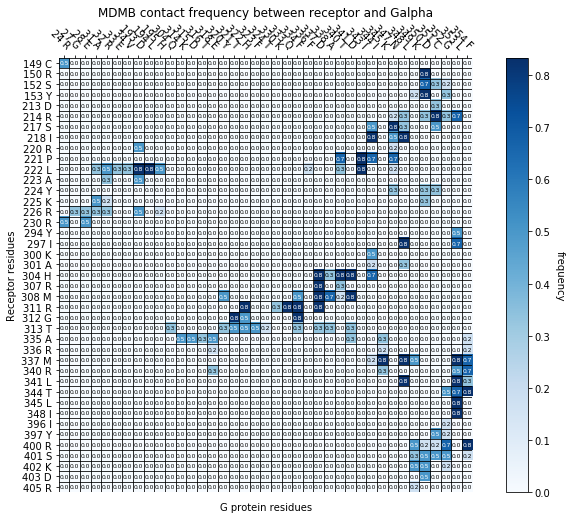

In [5]:
plt.clf()
plt.figure(figsize=(12,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix, xlabels, ylabels, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('MDMB contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)


### Analyze the 2nd traj

In [6]:
matrix2, xlabels2, ylabels2, x_axis_label, y_axis_label = master('traj_frequency', 'cp55', 'cp55_parameters.ini',convert_index)

#print(matrix2)
print(xlabels2)
print('')
print(ylabels2)

print(len(xlabels2))
print(len(ylabels2))

  0%|          | 0/290 [00:00<?, ?it/s]

cp55_parameters.ini
['mdmb', 'cp55']
It will search all possible residues and may take a while.


 16%|█▌        | 47/290 [02:18<11:48,  2.91s/it]

keep record:r_id 150 and l_id 350
rec_residue ARG and lig_residue ASP



 17%|█▋        | 49/290 [02:24<11:42,  2.92s/it]

keep record:r_id 152 and l_id 350
rec_residue SER and lig_residue ASP



 17%|█▋        | 50/290 [02:26<11:39,  2.92s/it]

keep record:r_id 153 and l_id 350
rec_residue TYR and lig_residue ASP



 38%|███▊      | 110/290 [05:23<08:45,  2.92s/it]

keep record:r_id 213 and l_id 350
rec_residue ASH and lig_residue ASP

keep record:r_id 213 and l_id 351
rec_residue ASH and lig_residue CYS



 38%|███▊      | 111/290 [05:26<08:42,  2.92s/it]

keep record:r_id 214 and l_id 347
rec_residue ARG and lig_residue ASN

keep record:r_id 214 and l_id 350
rec_residue ARG and lig_residue ASP

keep record:r_id 214 and l_id 351
rec_residue ARG and lig_residue CYS

keep record:r_id 214 and l_id 352
rec_residue ARG and lig_residue GLY

keep record:r_id 214 and l_id 353
rec_residue ARG and lig_residue LEU



 39%|███▉      | 114/290 [05:34<08:32,  2.91s/it]

keep record:r_id 217 and l_id 347
rec_residue SER and lig_residue ASN

keep record:r_id 217 and l_id 351
rec_residue SER and lig_residue CYS



 40%|███▉      | 115/290 [05:37<08:29,  2.91s/it]

keep record:r_id 218 and l_id 344
rec_residue ILE and lig_residue ILE

keep record:r_id 218 and l_id 347
rec_residue ILE and lig_residue ASN

keep record:r_id 218 and l_id 348
rec_residue ILE and lig_residue LEU

keep record:r_id 218 and l_id 351
rec_residue ILE and lig_residue CYS



 40%|████      | 117/290 [05:43<08:24,  2.91s/it]

keep record:r_id 221 and l_id 194
rec_residue PRO and lig_residue LEU



 41%|████      | 118/290 [05:46<08:21,  2.92s/it]

keep record:r_id 221 and l_id 340
rec_residue PRO and lig_residue THR

keep record:r_id 221 and l_id 343
rec_residue PRO and lig_residue ILE

keep record:r_id 221 and l_id 344
rec_residue PRO and lig_residue ILE

keep record:r_id 221 and l_id 347
rec_residue PRO and lig_residue ASN

keep record:r_id 222 and l_id 30
rec_residue LEU and lig_residue ALA

keep record:r_id 222 and l_id 31
rec_residue LEU and lig_residue ALA

keep record:r_id 222 and l_id 32
rec_residue LEU and lig_residue ARG

keep record:r_id 222 and l_id 33
rec_residue LEU and lig_residue GLU

keep record:r_id 222 and l_id 34
rec_residue LEU and lig_residue VAL

keep record:r_id 222 and l_id 193
rec_residue LEU and lig_residue ASP

keep record:r_id 222 and l_id 194
rec_residue LEU and lig_residue LEU

keep record:r_id 222 and l_id 195
rec_residue LEU and lig_residue HIS

keep record:r_id 222 and l_id 219
rec_residue LEU and lig_residue THR

keep record:r_id 222 and l_id 336
rec_residue LEU and lig_residue PHE

keep record

 41%|████      | 119/290 [05:49<08:25,  2.95s/it]

keep record:r_id 223 and l_id 31
rec_residue ALA and lig_residue ALA



 42%|████▏     | 121/290 [05:55<08:17,  2.94s/it]

keep record:r_id 224 and l_id 347
rec_residue TYR and lig_residue ASN

keep record:r_id 224 and l_id 350
rec_residue TYR and lig_residue ASP

keep record:r_id 224 and l_id 351
rec_residue TYR and lig_residue CYS

keep record:r_id 225 and l_id 28
rec_residue LYS and lig_residue GLU

keep record:r_id 225 and l_id 30
rec_residue LYS and lig_residue ALA

keep record:r_id 225 and l_id 31
rec_residue LYS and lig_residue ALA

keep record:r_id 225 and l_id 32
rec_residue LYS and lig_residue ARG



 42%|████▏     | 122/290 [05:58<08:16,  2.96s/it]

keep record:r_id 226 and l_id 25
rec_residue ARG and lig_residue GLU

keep record:r_id 226 and l_id 28
rec_residue ARG and lig_residue GLU

keep record:r_id 226 and l_id 31
rec_residue ARG and lig_residue ALA

keep record:r_id 226 and l_id 32
rec_residue ARG and lig_residue ARG



 43%|████▎     | 125/290 [06:07<08:07,  2.95s/it]

keep record:r_id 229 and l_id 31
rec_residue THR and lig_residue ALA



 44%|████▍     | 128/290 [06:16<07:56,  2.94s/it]

keep record:r_id 232 and l_id 24
rec_residue LYS and lig_residue ARG



 66%|██████▌   | 191/290 [09:21<04:50,  2.94s/it]

keep record:r_id 294 and l_id 353
rec_residue TYR and lig_residue LEU



 67%|██████▋   | 194/290 [09:30<04:40,  2.93s/it]

keep record:r_id 297 and l_id 348
rec_residue ILE and lig_residue LEU

keep record:r_id 297 and l_id 351
rec_residue ILE and lig_residue CYS

keep record:r_id 297 and l_id 353
rec_residue ILE and lig_residue LEU



 68%|██████▊   | 197/290 [09:39<04:31,  2.92s/it]

keep record:r_id 300 and l_id 344
rec_residue LYS and lig_residue ILE



 68%|██████▊   | 198/290 [09:42<04:28,  2.91s/it]

keep record:r_id 301 and l_id 344
rec_residue ALA and lig_residue ILE

keep record:r_id 301 and l_id 348
rec_residue ALA and lig_residue LEU



 69%|██████▉   | 200/290 [09:48<04:22,  2.91s/it]

keep record:r_id 304 and l_id 337
rec_residue HIE and lig_residue ASP

keep record:r_id 304 and l_id 340
rec_residue HIE and lig_residue THR

keep record:r_id 304 and l_id 341
rec_residue HIE and lig_residue ASP

keep record:r_id 304 and l_id 344
rec_residue HIE and lig_residue ILE



 70%|███████   | 203/290 [09:56<04:13,  2.91s/it]

keep record:r_id 307 and l_id 337
rec_residue ARG and lig_residue ASP

keep record:r_id 307 and l_id 340
rec_residue ARG and lig_residue THR

keep record:r_id 307 and l_id 344
rec_residue ARG and lig_residue ILE



 70%|███████   | 204/290 [09:59<04:10,  2.91s/it]

keep record:r_id 308 and l_id 320
rec_residue MET and lig_residue TYR

keep record:r_id 308 and l_id 337
rec_residue MET and lig_residue ASP

keep record:r_id 308 and l_id 338
rec_residue MET and lig_residue ALA

keep record:r_id 308 and l_id 341
rec_residue MET and lig_residue ASP



 71%|███████▏  | 207/290 [10:08<04:01,  2.91s/it]

keep record:r_id 311 and l_id 192
rec_residue ARG and lig_residue LYS

keep record:r_id 311 and l_id 333
rec_residue ARG and lig_residue GLN

keep record:r_id 311 and l_id 337
rec_residue ARG and lig_residue ASP



 72%|███████▏  | 208/290 [10:11<03:58,  2.91s/it]

keep record:r_id 312 and l_id 322
rec_residue GLY and lig_residue HIE

keep record:r_id 312 and l_id 330
rec_residue GLY and lig_residue LYS



 72%|███████▏  | 209/290 [10:14<03:56,  2.92s/it]

keep record:r_id 313 and l_id 320
rec_residue THR and lig_residue TYR

keep record:r_id 313 and l_id 322
rec_residue THR and lig_residue HIE

keep record:r_id 313 and l_id 330
rec_residue THR and lig_residue LYS

keep record:r_id 313 and l_id 333
rec_residue THR and lig_residue GLN

keep record:r_id 313 and l_id 334
rec_residue THR and lig_residue PHE

keep record:r_id 313 and l_id 337
rec_residue THR and lig_residue ASP

keep record:r_id 313 and l_id 338
rec_residue THR and lig_residue ALA



 73%|███████▎  | 212/290 [10:23<03:47,  2.91s/it]

keep record:r_id 337 and l_id 318
rec_residue MET and lig_residue GLU



 73%|███████▎  | 213/290 [10:26<03:45,  2.92s/it]

keep record:r_id 337 and l_id 341
rec_residue MET and lig_residue ASP

keep record:r_id 337 and l_id 344
rec_residue MET and lig_residue ILE

keep record:r_id 337 and l_id 345
rec_residue MET and lig_residue LYS

keep record:r_id 337 and l_id 348
rec_residue MET and lig_residue LEU

keep record:r_id 337 and l_id 349
rec_residue MET and lig_residue LYS

keep record:r_id 337 and l_id 354
rec_residue MET and lig_residue PHE



 74%|███████▍  | 214/290 [10:29<03:42,  2.92s/it]

keep record:r_id 338 and l_id 348
rec_residue ASP and lig_residue LEU



 74%|███████▍  | 216/290 [10:34<03:35,  2.92s/it]

keep record:r_id 340 and l_id 353
rec_residue ARG and lig_residue LEU

keep record:r_id 340 and l_id 354
rec_residue ARG and lig_residue PHE



 75%|███████▍  | 217/290 [10:37<03:32,  2.92s/it]

keep record:r_id 341 and l_id 348
rec_residue LEU and lig_residue LEU

keep record:r_id 341 and l_id 351
rec_residue LEU and lig_residue CYS

keep record:r_id 341 and l_id 353
rec_residue LEU and lig_residue LEU

keep record:r_id 341 and l_id 354
rec_residue LEU and lig_residue PHE



 76%|███████▌  | 220/290 [10:46<03:24,  2.91s/it]

keep record:r_id 344 and l_id 353
rec_residue THR and lig_residue LEU

keep record:r_id 344 and l_id 354
rec_residue THR and lig_residue PHE



 76%|███████▌  | 221/290 [10:49<03:21,  2.92s/it]

keep record:r_id 345 and l_id 353
rec_residue LEU and lig_residue LEU



 77%|███████▋  | 224/290 [10:58<03:12,  2.92s/it]

keep record:r_id 348 and l_id 352
rec_residue ILE and lig_residue GLY

keep record:r_id 348 and l_id 353
rec_residue ILE and lig_residue LEU

keep record:r_id 348 and l_id 354
rec_residue ILE and lig_residue PHE



 94%|█████████▍| 272/290 [13:29<00:52,  2.92s/it]

keep record:r_id 396 and l_id 351
rec_residue ILE and lig_residue CYS

keep record:r_id 396 and l_id 352
rec_residue ILE and lig_residue GLY

keep record:r_id 396 and l_id 353
rec_residue ILE and lig_residue LEU



 94%|█████████▍| 273/290 [13:32<00:49,  2.92s/it]

keep record:r_id 397 and l_id 350
rec_residue TYR and lig_residue ASP

keep record:r_id 397 and l_id 351
rec_residue TYR and lig_residue CYS

keep record:r_id 397 and l_id 352
rec_residue TYR and lig_residue GLY

keep record:r_id 397 and l_id 353
rec_residue TYR and lig_residue LEU



 95%|█████████▍| 275/290 [13:37<00:43,  2.91s/it]

keep record:r_id 399 and l_id 352
rec_residue LEU and lig_residue GLY



 95%|█████████▌| 276/290 [13:40<00:40,  2.91s/it]

keep record:r_id 400 and l_id 349
rec_residue ARG and lig_residue LYS

keep record:r_id 400 and l_id 350
rec_residue ARG and lig_residue ASP

keep record:r_id 400 and l_id 352
rec_residue ARG and lig_residue GLY

keep record:r_id 400 and l_id 353
rec_residue ARG and lig_residue LEU

keep record:r_id 400 and l_id 354
rec_residue ARG and lig_residue PHE



 96%|█████████▌| 277/290 [13:43<00:37,  2.91s/it]

keep record:r_id 401 and l_id 349
rec_residue SER and lig_residue LYS

keep record:r_id 401 and l_id 350
rec_residue SER and lig_residue ASP

keep record:r_id 401 and l_id 351
rec_residue SER and lig_residue CYS

keep record:r_id 401 and l_id 352
rec_residue SER and lig_residue GLY



 96%|█████████▌| 278/290 [13:46<00:34,  2.91s/it]

keep record:r_id 402 and l_id 346
rec_residue LYS and lig_residue ASN

keep record:r_id 402 and l_id 349
rec_residue LYS and lig_residue LYS

keep record:r_id 402 and l_id 350
rec_residue LYS and lig_residue ASP



 96%|█████████▌| 279/290 [13:49<00:32,  2.91s/it]

keep record:r_id 403 and l_id 350
rec_residue ASP and lig_residue ASP



 97%|█████████▋| 281/290 [13:55<00:26,  2.91s/it]

keep record:r_id 405 and l_id 349
rec_residue ARG and lig_residue LYS



100%|██████████| 290/290 [14:21<00:00,  2.97s/it]

sorted not_empty_yindex [23, 24, 27, 29, 30, 31, 32, 33, 64, 65, 66, 67, 91, 190, 192, 194, 202, 205, 206, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226]

ligand_labels, not sorted ['350 D', '350 D', '350 D', '350 D', '351 C', '347 N', '350 D', '351 C', '352 G', '353 L', '347 N', '351 C', '344 I', '347 N', '348 L', '351 C', '194 L', '340 T', '343 I', '344 I', '347 N', '30 A', '31 A', '32 R', '33 E', '34 V', '193 D', '194 L', '195 H', '219 T', '336 F', '339 V', '340 T', '343 I', '347 N', '31 A', '347 N', '350 D', '351 C', '28 E', '30 A', '31 A', '32 R', '25 E', '28 E', '31 A', '32 R', '31 A', '24 R', '353 L', '348 L', '351 C', '353 L', '344 I', '344 I', '348 L', '337 D', '340 T', '341 D', '344 I', '337 D', '340 T', '344 I', '320 Y', '337 D', '338 A', '341 D', '192 K', '333 Q', '337 D', '322 H', '330 K', '320 Y', '322 H', '330 K', '333 Q', '334 F', '337 D', '338 A', '318 E', '341 D', '344 I', '345 K', '348 L', '349 K', '354 F', '348 L', '353 L',

Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

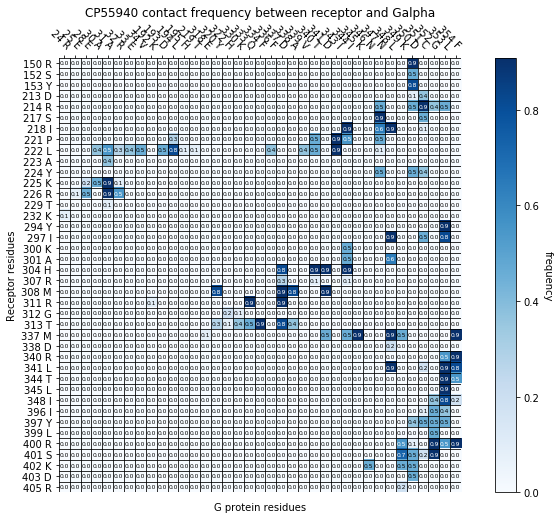

In [8]:
plt.clf()
plt.figure(figsize=(12,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix2, xlabels2, ylabels2, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('CP55940 contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)


### Combine two trajs information together

label_list2 ['150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '229 T', '232 K', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '337 M', '338 D', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '399 L', '400 R', '401 S', '402 K', '403 D', '405 R']
Function: make_union_list

['149 C', '150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '220 R', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '229 T', '230 R', '232 K', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '335 A', '336 R', '337 M', '338 D', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '399 L', '400 R', '401 S', '402 K', '403 D', '405 R'] sorted


label_list2 ['24 R', '25 E', '28 E', '30 A', '31 A', '32 R', '33 E', '34 V', '192 K', '193 D', '194 L', '195 H', '219 T', '318 E', '320 Y', '322 H', '330 K', '333 Q', '334 F', '336 F', 

<Figure size 432x288 with 0 Axes>

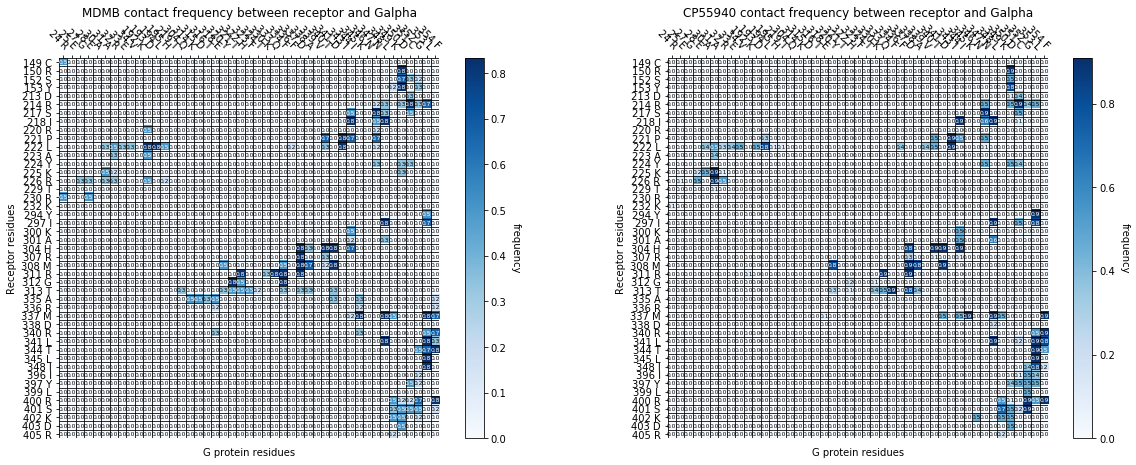

In [9]:
full_xlabels = make_union_list(xlabels, xlabels2)
full_ylabels = make_union_list(ylabels, ylabels2)

print('X - Receptor Residues')
print(full_xlabels)
print('')
print('number of (Full) Receptor residues is:', len(full_xlabels))

print('')
print('')

print('Y - Galpha Residues')
print(full_ylabels)
print('')
print('number of (Full) Galpha residues is:', len(full_ylabels))
print('')

print('mdmb - Galpha', ylabels)
print('')

expanded_sample1_matrix = expanded_matrix(matrix, full_xlabels, full_ylabels, xlabels, ylabels)
print('')
expanded_sample2_matrix = expanded_matrix(matrix2, full_xlabels, full_ylabels, xlabels2, ylabels2)

print (expanded_sample1_matrix)
print('END of expanded matrix - SAMPLE 1')
print('')

### expanded_matrix does not match individual matrix. There is a shift in contacts

### function: filter_duplicate_matrix
### function: reorder_matrix

non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample1_matrix,full_xlabels,full_ylabels)
non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample2_matrix,full_xlabels,full_ylabels)

reordered_sample1_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel)
reordered_sample2_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel)

#print (reordered_sample1_matrix)
#print ('END of reordered matrix - SAMPLE 1')

########################################################################################################################################

plt.clf()
plt.figure(figsize=(20,7))
ax = plt.subplot(1, 2, 1)
im,cbar = heatmap(reordered_sample1_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('MDMB contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)

########################################################################################################################################

ax = plt.subplot(1, 2, 2)
im,cbar = heatmap(reordered_sample2_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('CP55940 contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)
plt.savefig('MDMB_CP55940.png')

### Calculate the difference between two trajs

cp55_parameters.ini
['mdmb', 'cp55']


<Figure size 432x288 with 0 Axes>

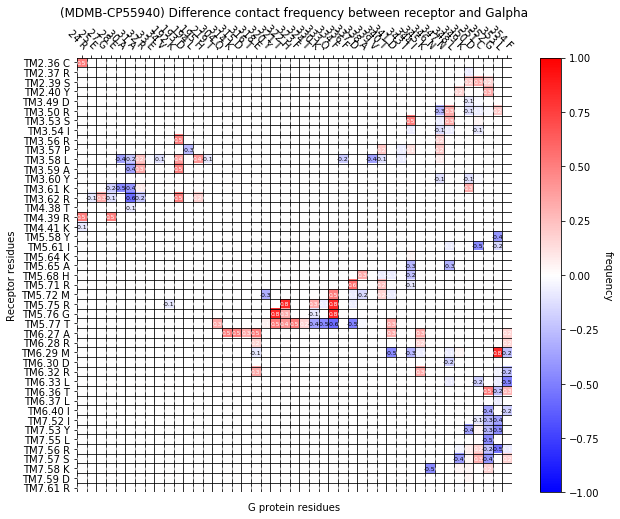

In [10]:
matrix, xlabel, ylabel = filter_empty_matrix(reordered_sample1_matrix-reordered_sample2_matrix, reordered_xlabel, reordered_ylabel)
translate_xlabel, translate_ylabel = add_labels('cp55', 'cp55_parameters.ini', xlabel, ylabel)
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix, translate_xlabel, translate_ylabel,ax=ax,cmap="bwr",vmin=-1,vmax=1,cbarlabel="frequency")
#im,cbar = heatmap(reordered_sample1_matrix-reordered_sample2_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="bwr",vmin=-1,vmax=1,cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('(MDMB-CP55940) Difference contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)
plt.savefig('MDMB_CP55940_diff.png')

In [11]:
threshold = 0.1
different_interaction_pairs=find_different_pair(matrix,xlabel, ylabel,threshold)

if not os.path.isdir('cont_freq_resids_list'):
    os.system('mkdir cont_freq_resids_list')
    
write_down_difference(different_interaction_pairs, 'cont_freq_resids_list/diff_between_MDMB_vs_CP_Ga_matrix.py')